In [1]:
import matplotlib.pyplot as plt
import sys
import pickle as pkl
sys.path.append('.')

from DNLutils import *
%matplotlib inline

In [2]:
superhist = "/home/adriansh/work/data/adc/histdataset1.pkl"
with open(superhist, "rb") as f:
    ds = pkl.load(f)

In [3]:
amp = "C10"
adcMax = 2**18
observed = np.zeros(adcMax)
xLowerLim = 26500
measuredCodes = np.arange(xLowerLim, xLowerLim+len(ds[amp]))
observed[measuredCodes] = ds[amp]
expected33 = savgol_filter(observed, 33, 3)
expected65 = savgol_filter(observed, 65, 3)

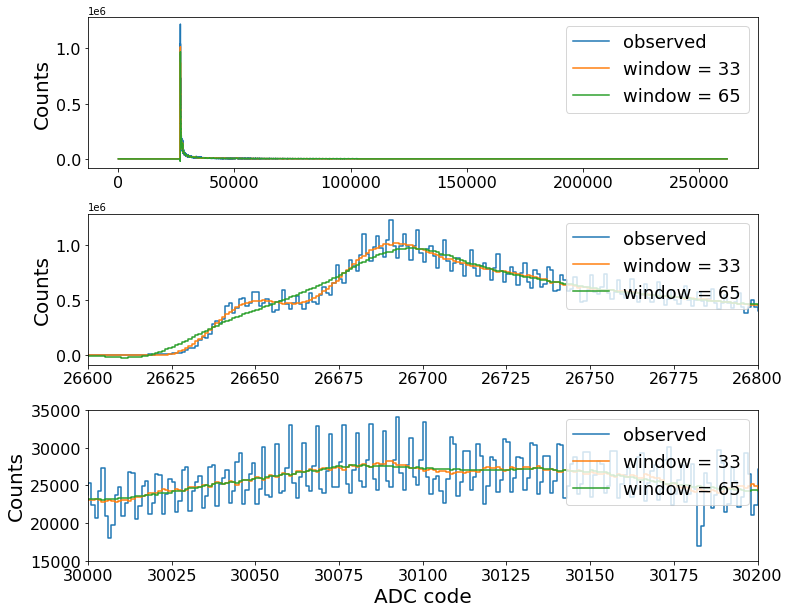

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
for ax in axs.ravel():
    ax.plot(observed, label="observed", ds="steps-post")
    ax.plot(expected33, label="window = 33", ds="steps-post")
    ax.plot(expected65, label="window = 65", ds="steps-post")
    ax.tick_params(labelsize=16)
    ax.set_ylabel("Counts", fontsize=20)
    ax.legend(fontsize=18, loc="upper right")
    
axs[1].set_xlim((26600, 26800))
axs[2].set_xlim((30000, 30200))
axs[2].set_xlabel("ADC code", fontsize=20)
axs[2].set_ylim((15000, 35000))

fig.subplots_adjust(hspace=0.3)

plt.show(fig)

/home/adriansh/work/software/notebook/jupyterenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


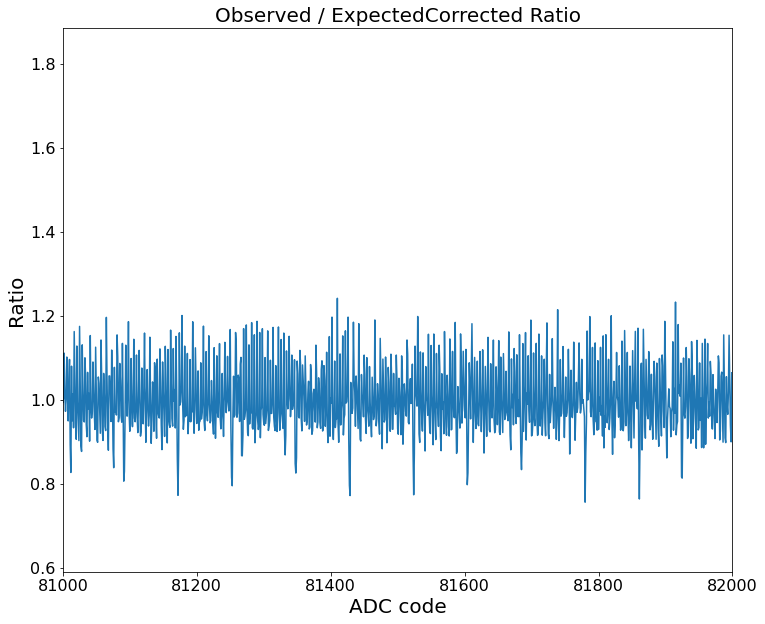

In [5]:
xCutoff = 30000
expectedCorrected = (expected33 * observed.sum() /
                     expected33.sum())
observedExpectedRatio = observed / expectedCorrected

x = measuredCodes[xCutoff:]
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(x, observedExpectedRatio[x])
ax.tick_params(labelsize=16)
ax.set_ylabel("Ratio", fontsize=20)
ax.set_xlim((81000, 82000))
ax.set_xlabel("ADC code", fontsize=20)
ax.set_title("Observed / ExpectedCorrected Ratio", fontsize=20)

plt.show(fig)

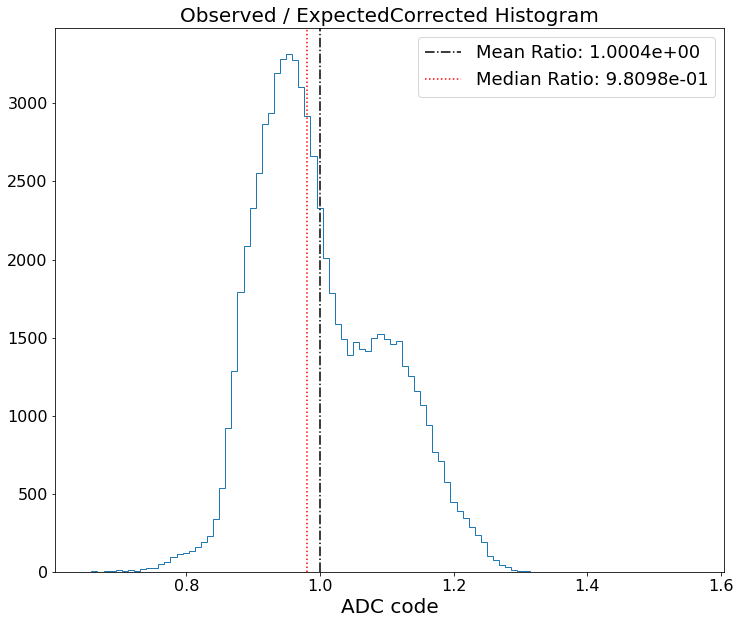

In [6]:
meanRatio = observedExpectedRatio[xCutoff: measuredCodes[-1]].mean()
medianRatio = np.median(observedExpectedRatio[xCutoff: measuredCodes[-1]])
fig, ax = plt.subplots(figsize=(12, 10))
ax.hist(observedExpectedRatio[xCutoff: measuredCodes[-1]], bins=100, histtype="step")
ax.tick_params(labelsize=16)
ax.set_xlabel("ADC code", fontsize=20)
ax.set_title("Observed / ExpectedCorrected Histogram", fontsize=20)
ax.axvline(meanRatio, ls="-.", c="k",
           label=f"Mean Ratio: {meanRatio:.4e}")
ax.axvline(medianRatio, ls=":", c="r",
           label=f"Median Ratio: {medianRatio:.4e}")
ax.legend(loc="upper right", fontsize=18)
plt.show(fig)

In [7]:
minCounts = 150
adcConstructor = ADCconstructor(observed, expected33, minCounts=minCounts, xCutoff=xCutoff)
workingCodes = adcConstructor.workingCodes
# adcConstructor65 = ADCconstructor(observed, expected65, minCounts=minCounts, xCutoff=xCutoff)

adcBinsSpline = adcConstructor.buildADCEdges(mode="spline")
# adcBins65 = adcConstructor65.buildADCEdges()

In [8]:
# inl65 = calculateINL(adcBins65)
# dnl65 = calculateDNL(adcBins65)
# edgeOffset65 = np.arange(adcMax) - adcBins65[:-1]

# inl33 = calculateINL(adcBins33)
# dnl33 = calculateDNL(adcBins33)
# edgeOffset33 = adcBins33[:-1] - np.arange(adcMax)

inl = calculateINL(adcBinsSpline)
dnl = calculateDNL(adcBinsSpline)
edgeOffset = np.arange(adcMax) - adcBinsSpline[:-1]

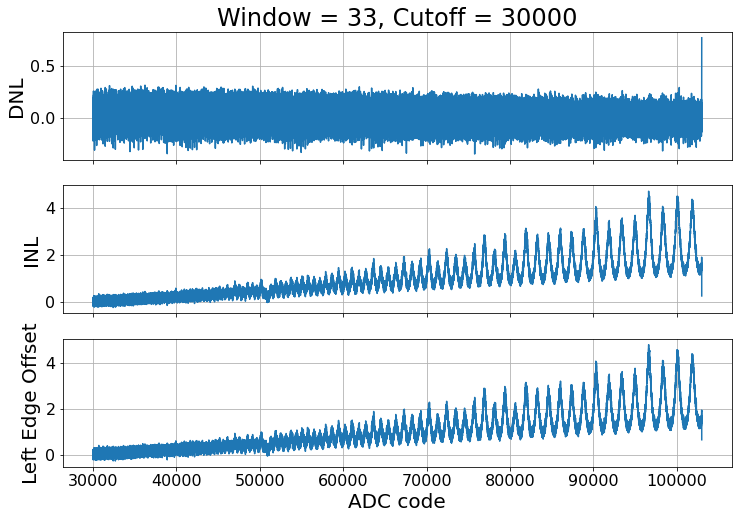

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axs[0].set_title("Window = 33, Cutoff = 30000", fontsize=24)
axs[0].plot(workingCodes, dnl[workingCodes])
axs[0].tick_params(labelsize=16)
axs[0].set_ylabel("DNL", fontsize=20)
axs[0].grid(visible=True)

axs[1].plot(workingCodes, inl[workingCodes])
axs[1].tick_params(labelsize=16)
axs[1].set_ylabel("INL", fontsize=20)
axs[1].grid(visible=True)

axs[2].plot(workingCodes, edgeOffset[workingCodes])
axs[2].tick_params(labelsize=16)
axs[2].set_ylabel("Left Edge Offset", fontsize=20)
axs[2].grid(visible=True)
axs[2].set_xlabel("ADC code", fontsize=20)

plt.show(fig)